# Fast Axial Localization for wide-field iSCAT

This notebook demonstrates the workflow for analyzing interferometric scattering (iSCAT) microscopy data following the approximate model introduced in "Fast 3D localization of nano-objects in wide-field interferometric scattering microscopy via vectorial diffraction model-derived analytical fitting" to perform axial localization of nano-objects. The workflow includes:

a) Loading and initializing data from `.mat` files  
b) Parameter configuration via JSON files  
c) Processing for axial localization  
d) Visualization of results

We will examine three different types of samples to showcase the performance of the method:
- Static sample: Minimal motion, used to establish baseline precision
- Dynamic sample: Thermal expansion-induced displacement
- Diffusion sample: Free Brownian motion in aqueous environment

Please install the required dependencies via Anaconda:
```bash
conda env create -f fast-iscat_env.yaml
conda activate fast-iscat_env
```

Note that the interactive slider provided by matplotlib may not function properly in Jupyter Notebook. For better visualization of the results, you may choose to run:
```bash
python demo.py
```

## 1. Import libraries and construct a function for processing different samples

First, we need to import the necessary libraries for data processing, visualization, and our custom axial localization package.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm.notebook import tqdm
import os

# Import custom modules for axial localization
# Import packages
import fast_iscat

# Set matplotlib to inline for Jupyter notebook
%matplotlib inline

# Configure plot styling for better visuals
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'figure.figsize': (10, 6),
    'axes.linewidth': 1.5
})

def process_sample(mat_filename, config_filename, plot_trace=True, sample_type="Static"):
    """   
    Process a sample for axial localization and plot the results.
    
    Parameters:
        mat_filename (str): Path to the .mat file
        config_filename (str): Path to the configuration JSON file
        plot_trace (bool): Whether to plot traces during processing
        sample_type (str): Type of sample (for plot title)
        
    Returns:
        numpy.ndarray: Normalized axial location measurements
    """
    # Load data
    Nipf = fast_iscat.utils.load_and_preprocess_data(mat_filename)
    
    # Load configuration parameters
    m = fast_iscat.parameters.iscat(config_filename)
    frame_interval = m.frame_interval
    
    # Process data to get normalized axial location
    print(f"Processing {sample_type} sample...")
    axial_location = fast_iscat.core.estimate_axial_location(Nipf, config_filename, plot_trace=plot_trace)
    
    # Plot the results
    fast_iscat.utils.plot_axial_location(
        axial_location, 
        frame_interval, 
        len(Nipf),
        title=f"{sample_type} Sample: Axial Location vs Time"
    )
    
    return axial_location

## 2. Static sample analysis

First, we'll analyze a static sample to demonstrate the basic workflow. Static samples have little or no motion in the axial direction, providing a good baseline for understanding the measurement precision.

Loaded data with shape: (9922, 27, 27)
Processing Static sample...


/opt/anaconda3/envs/fast-iscat_env/lib/python3.13/site-packages/pymc/sampling/mcmc.py:764: UserWarning: A list or tuple of random_seed no longer specifies the specific random_seed of each chain. Use a single seed instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...


Initial guess for defocus using Bayesian estimation...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [zf_estimated, zp_estimated, sigma]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 33 seconds.
There were 159 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Estimated defocus from Bayesian estimation: -0.10 μm
Starting axial localization...


Fitting Progress: 100%|████████████████████████████████████████████████████████| 9922/9922 [00:14<00:00, 703.86frame/s]


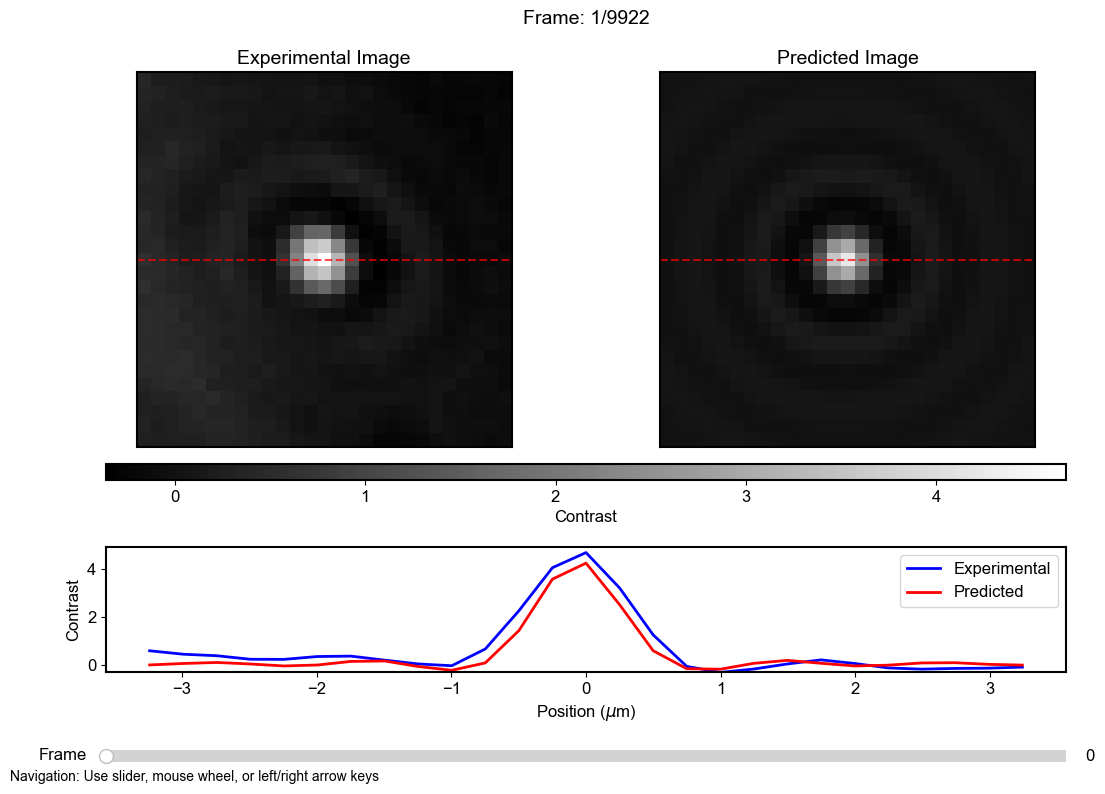

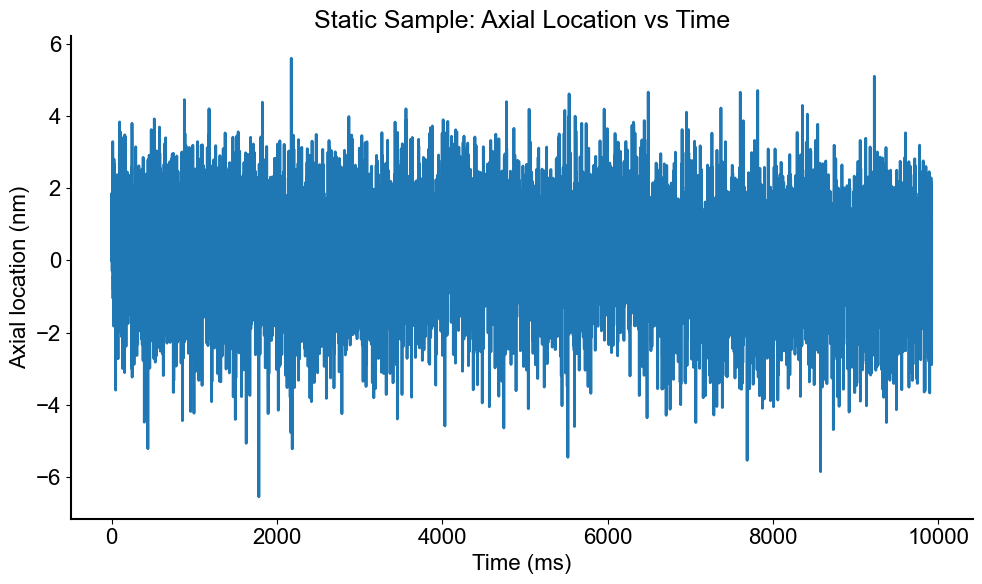


Statistical Analysis for Static Sample:
Mean axial location: 60.97 nm
Standard deviation: 1.45 nm
Range (max - min): 12.17 nm


In [2]:
# File paths for static sample
static_mat_filename = "./data/static.mat"
static_config_filename = "./config/parameters_static.json"

# Check if files exist
if os.path.exists(static_mat_filename) and os.path.exists(static_config_filename):
    # Process static sample
    static_axial_location = process_sample(static_mat_filename, static_config_filename, sample_type="Static")
    
    # Display statistical metrics
    print(f"\nStatistical Analysis for Static Sample:")
    print(f"Mean axial location: {np.mean(static_axial_location):.2f} nm")
    print(f"Standard deviation: {np.std(static_axial_location):.2f} nm")
    print(f"Range (max - min): {np.max(static_axial_location) - np.min(static_axial_location):.2f} nm")
else:
    print(f"Warning: Could not find static sample files. Please ensure '{static_mat_filename}' and '{static_config_filename}' exist in the current directory.")

## 3. Dynamic Sample Analysis (Thermal Expansion)

Now, we'll analyze a dynamic sample where the nano-object displacement is caused by thermal expansion of the surrounding material. This demonstrates the capability of our method to track axial displacements with high precision in response to temperature changes.

Loaded data with shape: (15001, 27, 27)
Processing Dynamic sample...


/opt/anaconda3/envs/fast-iscat_env/lib/python3.13/site-packages/pymc/sampling/mcmc.py:764: UserWarning: A list or tuple of random_seed no longer specifies the specific random_seed of each chain. Use a single seed instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...


Initial guess for defocus using Bayesian estimation...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [zf_estimated, zp_estimated, sigma]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 35 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Estimated defocus from Bayesian estimation: 6.96 μm
Starting axial localization...


Fitting Progress: 100%|██████████████████████████████████████████████████████| 15001/15001 [00:33<00:00, 441.38frame/s]


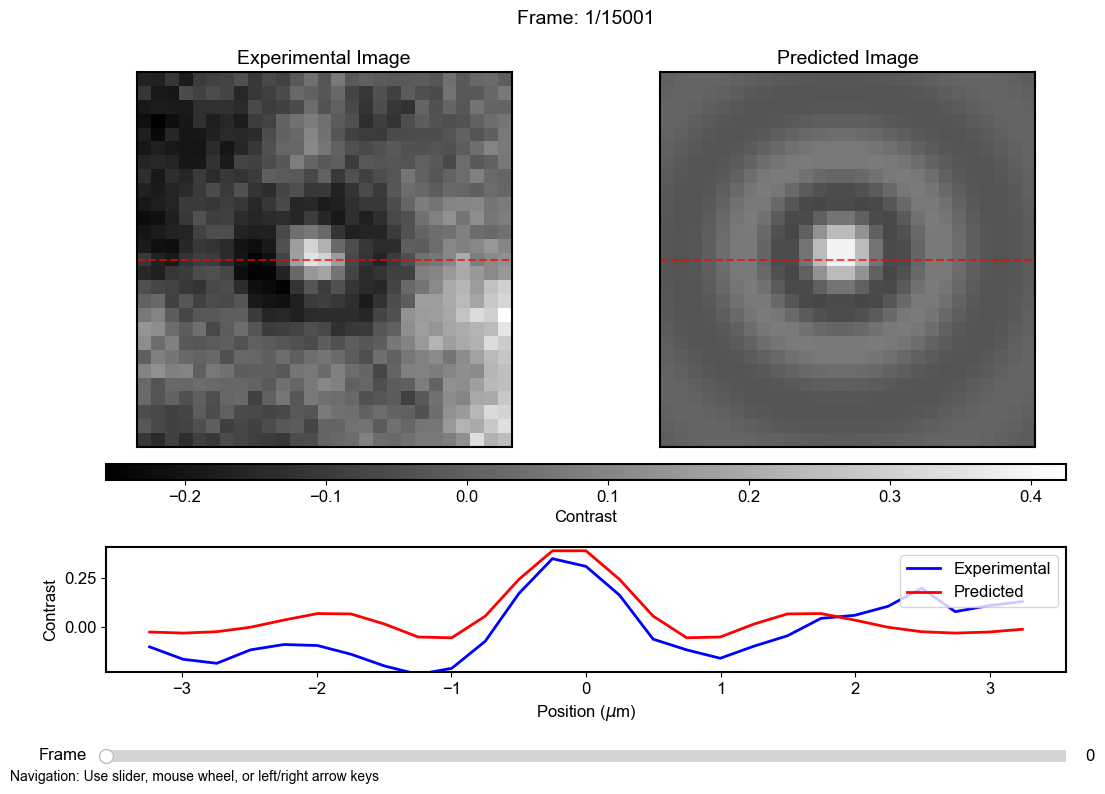

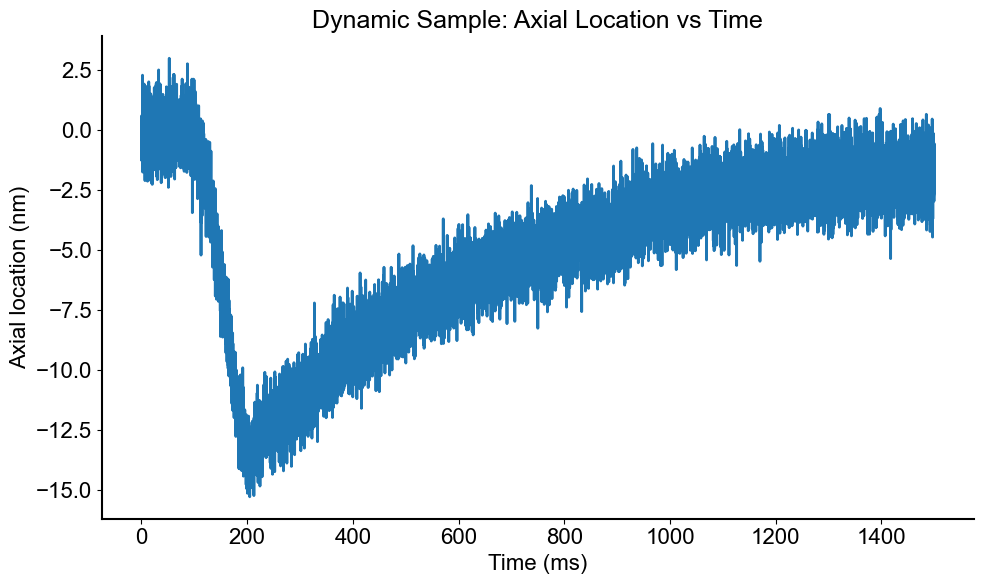


Statistical Analysis for Dynamic Sample:
Mean axial location: 9953.24 nm
Standard deviation: 3.57 nm
Range (max - min): 18.27 nm


In [3]:
# File paths for dynamic sample
dynamic_mat_filename = "./data/dynamic.mat"
dynamic_config_filename = "./config/parameters_dynamic.json"

# Check if files exist
if os.path.exists(dynamic_mat_filename) and os.path.exists(dynamic_config_filename):
    # Process dynamic sample
    dynamic_axial_location = process_sample(dynamic_mat_filename, dynamic_config_filename, sample_type="Dynamic")
    
    # Display statistical metrics
    print(f"\nStatistical Analysis for Dynamic Sample:")
    print(f"Mean axial location: {np.mean(dynamic_axial_location):.2f} nm")
    print(f"Standard deviation: {np.std(dynamic_axial_location):.2f} nm")
    print(f"Range (max - min): {np.max(dynamic_axial_location) - np.min(dynamic_axial_location):.2f} nm")
else:
    print(f"Warning: Could not find dynamic sample files. Please ensure '{dynamic_mat_filename}' and '{dynamic_config_filename}' exist in the current directory.")

## 4. Diffusion Sample Analysis (Brownian Motion)

Finally, we'll analyze a sample where the nano-object undergoes Brownian motion as it diffuses freely in water. This showcases the ability of our method to track the stochastic 3D movement of nanoparticles in liquid environments. Note that to achieve a large dynamic range, this section relies on the approximate model provided by Eq. (S20) in the supplementary material and additional regularization is used to ensure temporal consistency.

Loaded data with shape: (4500, 53, 53)
Processing Diffusion sample...


/opt/anaconda3/envs/fast-iscat_env/lib/python3.13/site-packages/pymc/sampling/mcmc.py:764: UserWarning: A list or tuple of random_seed no longer specifies the specific random_seed of each chain. Use a single seed instead.
  warnings.warn(
Initializing NUTS using jitter+adapt_diag...


Initial guess for defocus using Bayesian estimation...


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [zf_estimated, zp_estimated, sigma]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 158 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Estimated defocus from Bayesian estimation: -0.97 μm
Starting axial localization...


Fitting Progress: 100%|████████████████████████████████████████████████████████| 4500/4500 [00:43<00:00, 103.02frame/s]


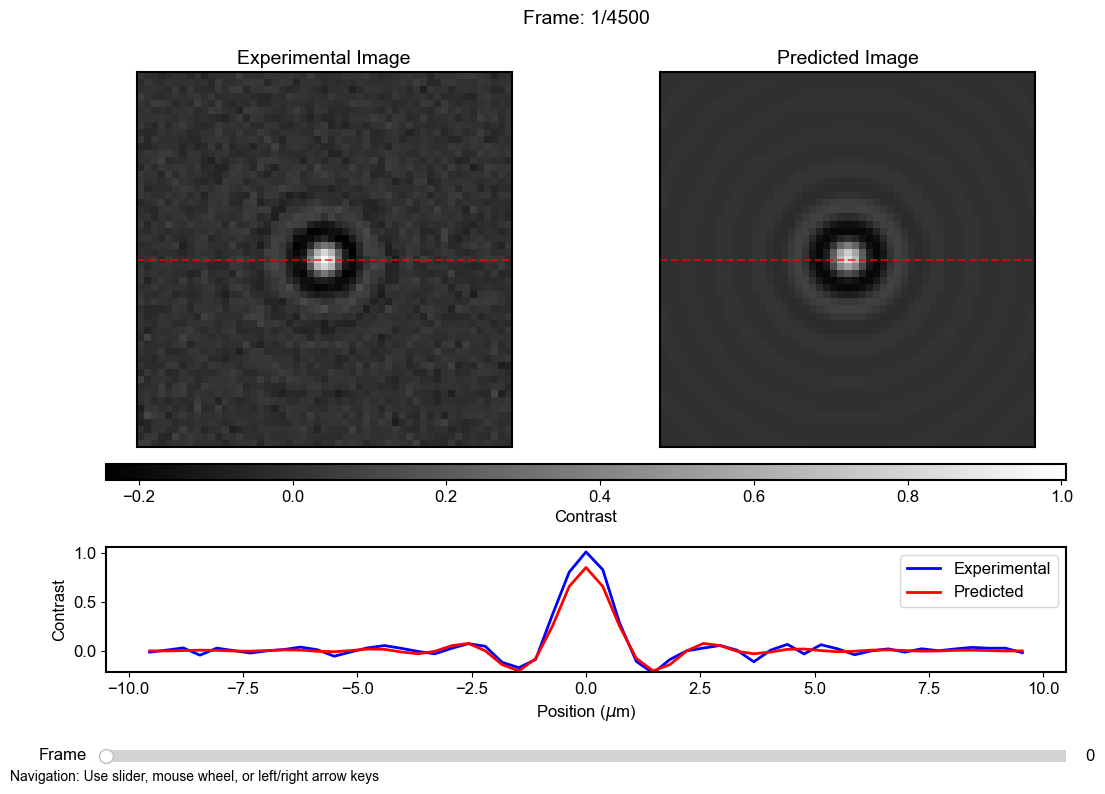

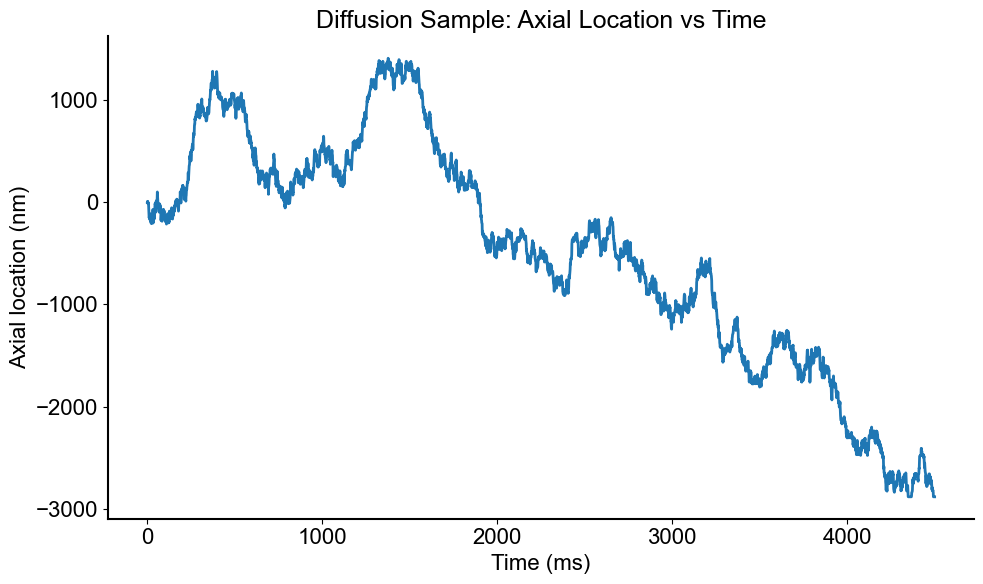


Statistical Analysis for Diffusion Sample:
Mean axial location: 2387.88 nm
Standard deviation: 1120.04 nm
Range (max - min): 4289.04 nm


In [4]:
# File paths for diffusion sample
diffusion_mat_filename = "./data/diffusion.mat"
diffusion_config_filename = "./config/parameters_diffusion.json"

# Check if files exist
if os.path.exists(diffusion_mat_filename) and os.path.exists(diffusion_config_filename):
    # Process diffusion sample
    diffusion_axial_location = process_sample(diffusion_mat_filename, diffusion_config_filename, sample_type="Diffusion")
    
    # Display statistical metrics
    print(f"\nStatistical Analysis for Diffusion Sample:")
    print(f"Mean axial location: {np.mean(diffusion_axial_location):.2f} nm")
    print(f"Standard deviation: {np.std(diffusion_axial_location):.2f} nm")
    print(f"Range (max - min): {np.max(diffusion_axial_location) - np.min(diffusion_axial_location):.2f} nm")
else:
    print(f"Warning: Could not find diffusion sample files. Please ensure '{diffusion_mat_filename}' and '{diffusion_config_filename}' exist in the current directory.")